In [3]:
# Importando as bibliotecas que serão utilizadas

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [4]:
# Listando os caminhos completos para todos os arquivos dentro das subpastas de "animals10-small"

data_path = os.getcwd()+f'//..//..//data//raw//animals10_small'
data_join = [os.path.join(data_path, data) for data in os.listdir(data_path)]
path = [os.path.join(data, file) for data in data_join for file in os.listdir(data)]

In [5]:
# Carregando o modelo ResNet-50

base_model = ResNet50(weights='imagenet',include_top=False)


In [6]:
# Lendo as imagens

def extract_images(path_images, model):
    images_list = []

    for path_image in path_images:
        image = load_img(path_image, target_size=(224, 224))
        images = img_to_array(image)
        images = np.expand_dims(images, axis=0)
        images = preprocess_input(images)
        features = model.predict(images, verbose=0)
        images_list.append(features.flatten())
    return np.array(images_list)

In [7]:
# Extraindo as imagens

extract_image = extract_images(path, base_model)

In [9]:
# Clusterizando com K-Means

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=10)

In [10]:
# Ajustando o modelo aos dados das imagens extraídas e prever os rótulos de clusters para cada uma destas imagens

predicted_labels = kmeans.fit_predict(extract_image)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Exibindo as imagens

def image_show(path_images, labels, cluster_id):
    cluster_index = np.where(labels == cluster_id)[0]
    sample_indices = np.random.choice(cluster_index, 5, replace=False)
    plt.figure(figsize=(12, 5))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, 5, i+1)
        image = load_img(path_images[idx], target_size=(224, 224))
        plt.imshow(image)
        plt.axis('off')
    plt.show()

Cluster 1:


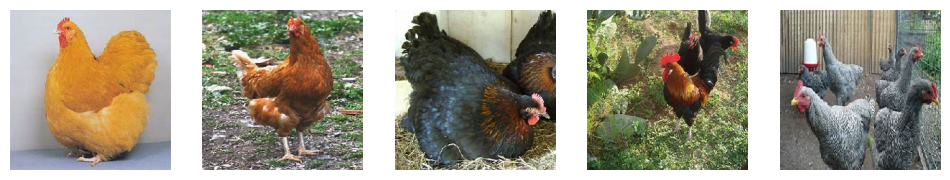

Cluster 2:


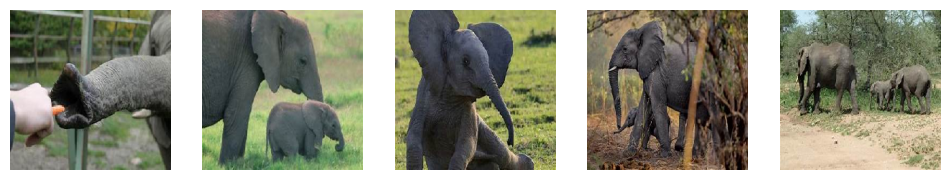

Cluster 3:


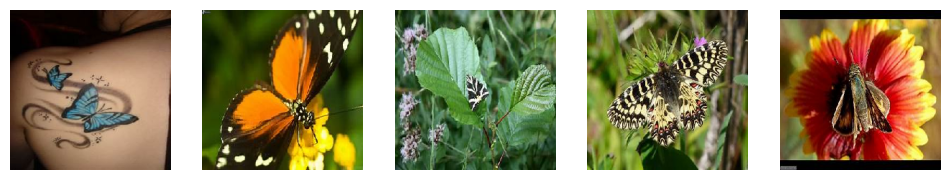

Cluster 4:


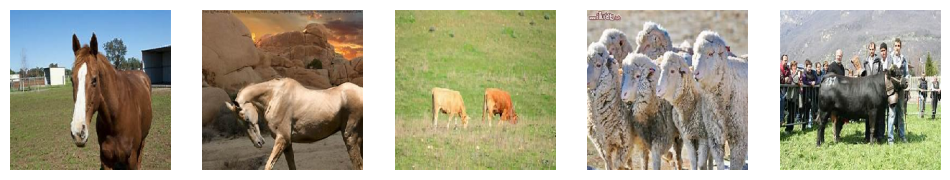

Cluster 5:


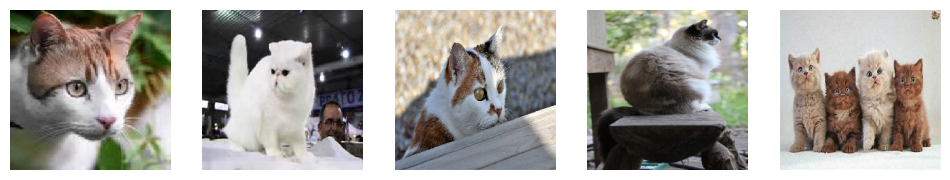

Cluster 6:


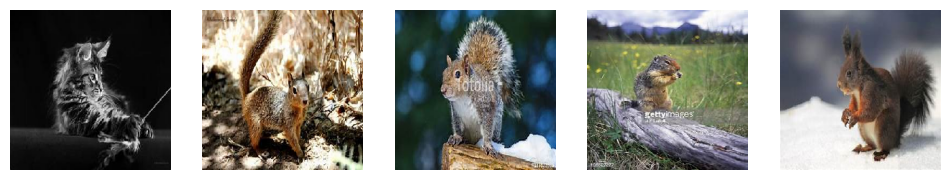

Cluster 7:


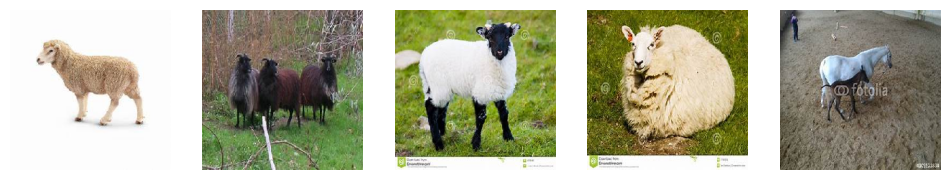

Cluster 8:


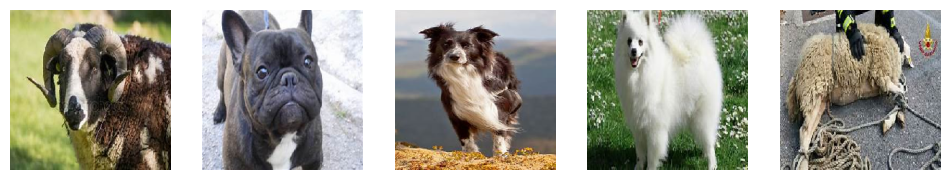

Cluster 9:


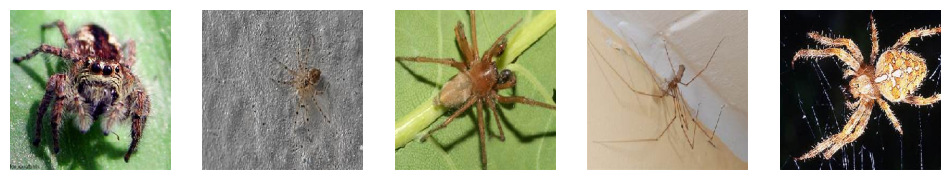

Cluster 10:


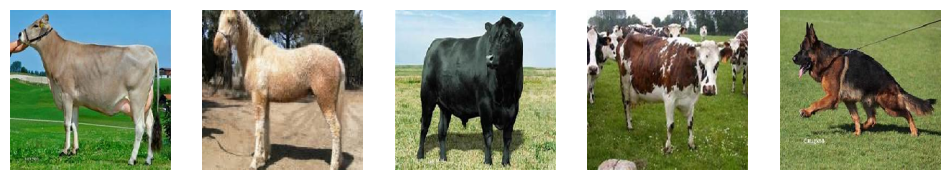

In [12]:
# Mostrando as imagens em cada cluster

for cluster_id in range(10):
    print(f"Cluster {cluster_id+1}:")
    image_show(path, predicted_labels, cluster_id)

In [13]:

# Obtendo os rótulos verdadeiros para as imagens em "path_images"

true_labels = [os.path.basename(os.path.dirname(path_image)) for path_image in path]

In [14]:
# Ajustando o codificador aos rótulos únicos e transforma os rótulos em valores numéricos
labels_encoded = LabelEncoder()
true_labels_encoded = labels_encoded.fit_transform(true_labels)

In [15]:
# Convertendo as classes únicas ajustadas pelo codificador em um array NumPy 

class_names = np.array(labels_encoded.classes_)

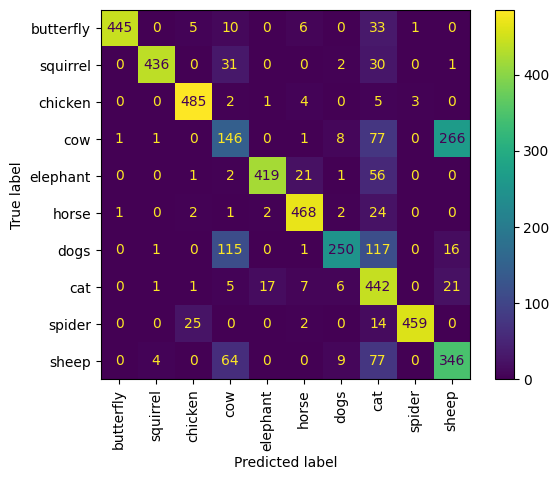

In [18]:
# Matriz de confusão

confusion = confusion_matrix(true_labels_encoded, predicted_labels)
order = np.argmax(confusion, axis=0)
confusion = confusion[order]
class_names = class_names[order]
ConfusionMatrixDisplay(confusion, display_labels=class_names).plot()
plt.xticks(rotation=90)
plt.show()

In [19]:
accuracy = np.trace(confusion) / np.sum(confusion)
precision = np.diag(confusion) / np.sum(confusion, axis=0)
recall = np.diag(confusion) / np.sum(confusion, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

average_precision = np.mean(precision)
average_recall = np.mean(recall)
average_f1_score = np.mean(f1_score)

print(f'Acurácia: {accuracy * 100 :.2f}%')
print(f'Precisão: {average_precision * 100 :.2f}%')
print(f'Revocação: {average_recall * 100 :.2f}%')
print(f'F1-Score: {average_f1_score * 100 :.2f}%')


Acurácia: 77.92%
Precisão: 81.03%
Revocação: 77.92%
F1-Score: 78.10%
